In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
img0 = plt.imread("./4-bn_0.jpg")
img1 = plt.imread("./4-bn_1.jpg")
img2 = plt.imread("./4-bn_2.jpg")

In [17]:
print(img0.shape)

(256, 256, 3)


In [3]:
imgs = np.zeros((3, ) + img0.shape)
imgs[0] = img0/255.0
imgs[1] = img1/255.0
imgs[2] = img2/255.0

0.0 1.0


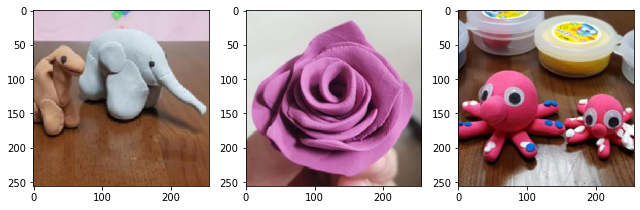

In [4]:
def plot_img(imgs):
    if imgs.min() < 0:
        imgs = imgs - imgs.min()
    if imgs.max() > 1:
        imgs = imgs/imgs.max()
        
    print(imgs.min(), imgs.max())
        
    fig, axs = plt.subplots(ncols=len(imgs), figsize=(3*len(imgs), 3))

    for img, ax in zip(imgs, axs):
        ax.imshow(img)

    fig.tight_layout()    
    return fig

fig = plot_img(imgs)
fig.savefig("./4-bn_3.png")

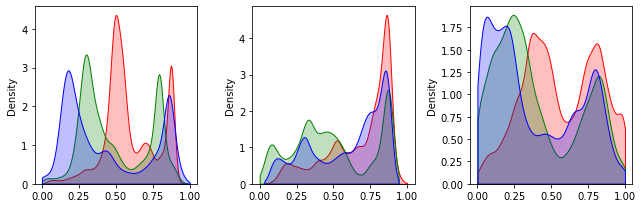

In [25]:
def plot_kde(imgs, symmetry=False):

    fig, axs = plt.subplots(ncols=len(imgs), figsize=(3*len(imgs), 3), sharex=True)

    for img, ax in zip(imgs, axs):
        channel = [0, 1, 2]
        color = ["r", "g", "b"]
        [sns.kdeplot(img[:,:,ch].flatten(), color=c, fill=True, ax=ax, cut=0) for ch, c in zip(channel, color)]

    xlim = ax.get_xlim()

    if symmetry==True:
        xlim = [-max(abs(xlim)), max(abs(xlim))]
        axs[0].set_xlim(xlim)
    
    fig.tight_layout() 
    return fig, axs

fig, axs = plot_kde(imgs)
fig.savefig("./4-bn_4.png")

In [6]:
imgs_tensor = tf.convert_to_tensor(imgs, dtype="float32")
bn0 = layers.BatchNormalization(trainable=True)(imgs_tensor)
bn0_numpy = bn0.numpy()

0.0 0.9995004
(-0.04997501969337464, 1.0494754135608673)
(-0.04997501969337464, 1.0494754135608673)
(-0.04997501969337464, 1.0494754135608673)


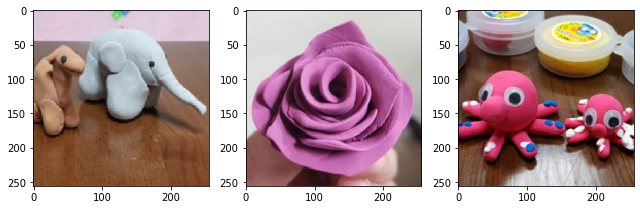

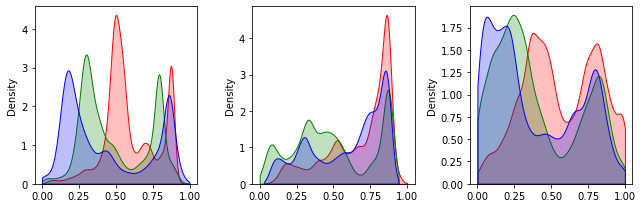

In [7]:
fig1 = plot_img(bn0_numpy)
fig1.savefig("./4-bn_5.png")

fig2, _ = plot_kde(bn0_numpy)
fig2.savefig("./4-bn_6.png")

In [8]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.BatchNormalization()
])
model.compile()

bn1 = model(imgs_tensor, training=True)
bn1_numpy = bn1.numpy()

0.0 1.0
(-2.9387622594833376, 2.265739989280701)
(-2.8363230526447296, 2.029400736093521)
(-2.9387622594833376, 2.265739989280701)


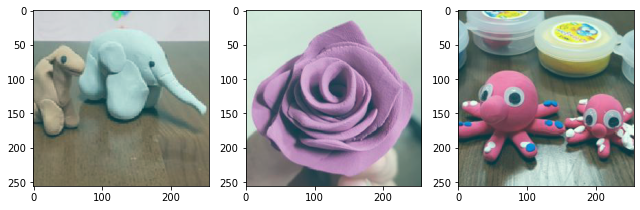

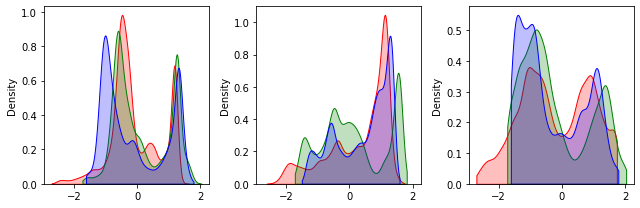

In [9]:
fig1 = plot_img(bn1_numpy)
fig1.savefig("./4-bn_7.png")

fig2, _ = plot_kde(bn1_numpy)
fig2.savefig("./4-bn_8.png")

# example data

In [10]:
ex_img0 = np.random.normal(loc=-0.5, scale=0.01, size=256*256*3).reshape((256, 256, 3))
ex_img1 = np.random.normal(loc=0.5, scale=0.01, size=256*256*3).reshape((256, 256, 3))
ex_img2 = np.random.normal(loc=-0.5, scale=0.01, size=256*256*3).reshape((256, 256, 3))

ex_imgs = np.zeros((3, ) + ex_img0.shape)
ex_imgs[0] = ex_img0
ex_imgs[1] = ex_img1
ex_imgs[2] = ex_img2

0.0 1.0
(-0.5469046768533452, -0.4515565973495778)
(0.4491595045242431, 0.5517019313319914)
(-0.5479336145228297, -0.44547978318544684)


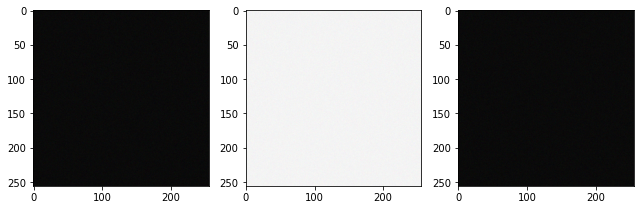

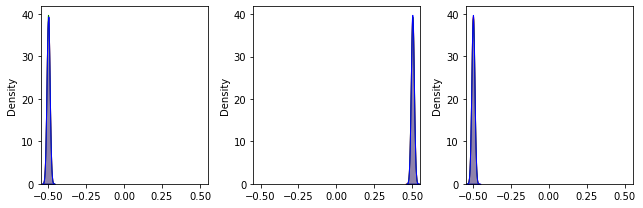

In [11]:
fig1 = plot_img(ex_imgs)
fig1.savefig("./4-bn_9.png")

fig2, _ = plot_kde(ex_imgs)
fig2.savefig("./4-bn_10.png")

In [12]:
print(ex_img0.var())

0.00010004582097558264


In [13]:
ex_imgs_tensor = tf.convert_to_tensor(ex_imgs, dtype="float32")
ex_bn1 = model(ex_imgs_tensor, training=True)
ex_bn1_numpy = ex_bn1.numpy()

0.0 1.0
(-0.8046701312065124, -0.6028166651725769)
(1.3031662464141847, 1.5201531887054442)
(-0.8067632019519806, -0.5900397002696991)


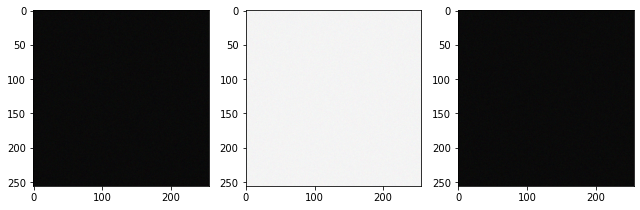

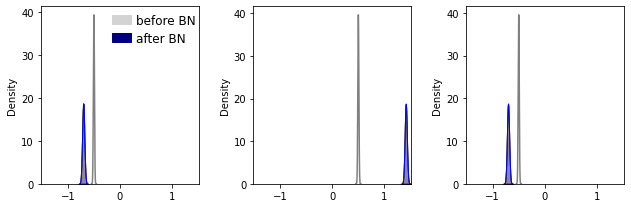

In [14]:
from matplotlib import patches

fig1 = plot_img(ex_bn1_numpy)
fig1.savefig("./4-bn_11.png")

fig2, axs = plot_kde(ex_bn1_numpy, symmetry=True)
for ax, ex_img in zip(axs, ex_imgs):
    sns.kdeplot(ex_img.flatten(), ax=ax, color="gray")

Rectangle0 = patches.Rectangle((0.45, 0.9), 0.12, 0.05, color="lightgray", transform=axs[0].transAxes)
axs[0].add_patch(Rectangle0)
axs[0].text(0.6, 0.9, "before BN", fontdict={"fontsize":12, "color":"k"}, transform=axs[0].transAxes)
Rectangle1 = patches.Rectangle((0.45, 0.8), 0.12, 0.05, color="navy", transform=axs[0].transAxes)
axs[0].add_patch(Rectangle1)
axs[0].text(0.6, 0.8, "after BN", fontdict={"fontsize":12, "color":"k"}, transform=axs[0].transAxes)
    
fig2.savefig("./4-bn_12.png")

In [15]:
print([ex_bn1_numpy[i].mean() for i in range(3)])

[-0.7053814, 1.4107242, -0.70534563]


In [16]:
mean = model.layers[0].variables[2].numpy()
var  = model.layers[0].variables[3].numpy()

print(mean, mean.mean())
print(var, var.mean())

[0.00435958 0.00288465 0.00303697] 0.0034270668
[0.9828158 0.983015  0.9831719] 0.98300093
